In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime
%matplotlib inline
plt.rcParams['font.family'] = ['SimHei'] #  set font for chinese in matplotlib figure

In [3]:
df_policy_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/policy_0702.csv')
df_claim_raw = pd.read_csv('../Tbrain_Insurance/policy_claim/claim_0702.csv')
df_training_raw = pd.read_csv('../Tbrain_Insurance/training-set.csv')
df_testing_raw = pd.read_csv('../Tbrain_Insurance/testing-set.csv')
df_policy = df_policy_raw 
df_claim = df_claim_raw 
df_training = df_training_raw
df_testing = df_testing_raw
pd.set_option('display.max_columns', None)

In [ ]:
# Policy_Number	保單號碼 
# Insured's_ID	被保險人代號(替代值) 
# Prior_Policy_Number	前保單號     almost == Cancellation =='Y'
# Cancellation	非繼承自前保單        almost match "Prior_policy Number, only #12 w/o cancellation
# Vehicle_identifier	車牌號碼 
# Vehicle_Make_and_Model1	廠牌名稱一 
# Vehicle_Make_and_Model2	廠牌名稱二
# Manafactured_Year_and_Month	製造年份 
# Engine_Displacement_(Cubic_Centimeter)	排氣量 
# Imported_or_Domestic_Car	車系代號
# Coding_of_Vehicle_Branding_&_Type	廠牌車型代號
# qpt	乘載數量 
# fpt	乘載單位 
# Main_Insurance_Coverage_Group	險種分類 
# Insurance_Coverage	險種代碼
# Insured_Amount1	保額一 
# Insured_Amount2	保額二 
# Insured_Amount3	保額三
# Coverage_Deductible_if_applied	自負額 
# Premium	簽單保費 
# Replacement_cost_of_insured_vehicle	重置成本
# Distribution_Channel	主通路代號 
# Multiple_Products_with_TmNewa_(Yes_or_No?)	同一車主前一年度非車險保單件數
# lia_class	車責本期級數 
# plia_acc	車責賠款係數 
# pdmg_acc	車體賠款係數 
# fassured	被保險人性質
# ibirth	出生日期 
# fsex	性別 
# fmarriage	婚姻狀況 
# aassured_zip	郵遞區號
# iply_area	承保地區代號(分公司) 
# dbirth	要保人出生日期 
# fequipment1	配備-音響註記 
# fequipment2	配備-車箱註記 
# fequipment3	配備-冷凍機組註記 
# fequipment4	配備-車框、車斗註記 
# fequipment5	配備-昇降系統註記 
# fequipment6	配備-電動車電池註記
# fequipment9	配備-其他 
# nequipment9	配備-其他說明

In [189]:
# check null column
# Prior_Policy_Number    328557
# Vehicle_identifier           513
# ibirth                              317765
# fsex                               41945
# fmarriage                      41945
# dbirth                            258932
nan_count = df_policy.isnull().sum()
# nan_count[nan_count > 0]

In [8]:
# Policy File
df_policy.shape # total count  (1747942, 41)
df_policy['Policy_Number'].nunique() # 351273 unique value

351273

## Prior_Policy_Number

In [191]:
# is null: not null =  328557 : 1419385
df_policy[df_policy['Prior_Policy_Number'].isnull()].head()

,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,Coding_of_Vehicle_Branding_&_Type,qpt,fpt,Main_Insurance_Coverage_Group,Insurance_Coverage,Insured_Amount1,Insured_Amount2,Insured_Amount3,Coverage_Deductible_if_applied,Premium,Replacement_cost_of_insured_vehicle,Distribution_Channel,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,ibirth,fsex,fmarriage,aassured_zip,iply_area,dbirth,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9,nequipment9,car
58,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,竊盜,05N,0,0,48000,10,90,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,,1.0
59,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16G,3000000,0,6000000,0,1280,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,,1.0
60,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,16P,0,0,500000,0,973,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,,1.0
61,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,29B,0,3000000,12000000,0,887,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,,1.0
62,88e2fb95af950a7b40eb2c8ad8fcf45626c65364,2828bbdbc3c3b5e0dde50792160df0aca99643469,NaN,Y,d1e0be6ed3b2a2dce38d3af8a286e0a1027be3f8,9e1816a8c2a63b7f96a82ce6487b2d43222750db,69948882b05c8a1da97a765a15cf088eeb16d298,2004,1781,10,4d51510e6b630677857b6b750a2d9e6d3c6159eb,5.0,P,車責,29K,0,0,3000000,0,475,46.0,39005d92752d56310b3a357f42b57f304621689a,23.0,-1,-0.38,0.0,2,NaN,,,efa6e44dfa0145249be273ecd84a97f534b04920,356a192b7913b04c54574d18c28d46e6395428ab,NaN,0,0,0,0,0,0,0,,1.0


In [22]:
df_policy.corr()

,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,qpt,Insured_Amount1,Insured_Amount2,Insured_Amount3,Coverage_Deductible_if_applied,Premium,Replacement_cost_of_insured_vehicle,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9
Manafactured_Year_and_Month,1.000000,0.075239,0.110571,0.041561,-0.034131,0.003810,0.000533,0.019921,0.135912,0.144311,0.042537,0.211318,0.161191,-0.311562,0.076779,0.004514,0.004544,0.005178,NaN,0.002396,NaN,0.006594
Engine_Displacement_(Cubic_Centimeter),0.075239,1.000000,0.292497,0.053299,0.017445,0.029710,0.025570,0.019811,0.109574,0.622069,0.008977,0.035519,0.034800,-0.108314,0.207278,-0.000112,0.000033,0.001358,NaN,0.001669,NaN,0.005600
Imported_or_Domestic_Car,0.110571,0.292497,1.000000,0.015569,0.007398,0.019067,0.021343,0.020701,0.096376,0.479211,-0.005012,0.034743,0.021117,-0.091039,0.022166,0.002605,-0.002115,-0.002432,NaN,-0.001201,NaN,0.003656
qpt,0.041561,0.053299,0.015569,1.000000,0.001374,0.002906,0.053581,0.002230,-0.013176,0.063478,0.004466,-0.071056,-0.070872,-0.023981,-0.163526,0.000056,-0.009884,-0.010635,NaN,0.000047,NaN,-0.000571
Insured_Amount1,-0.034131,0.017445,0.007398,0.001374,1.000000,0.019494,0.762060,-0.014474,0.043995,0.015943,0.003557,-0.026925,-0.022692,0.051928,-0.002078,-0.000334,-0.001308,-0.001530,NaN,0.001013,NaN,-0.001056
Insured_Amount2,0.003810,0.029710,0.019067,0.002906,0.019494,1.000000,0.211953,-0.009431,-0.061647,0.031660,0.007028,-0.006113,-0.004798,-0.002788,0.017363,-0.000614,0.000751,0.000331,NaN,0.000834,NaN,0.000251
Insured_Amount3,0.000533,0.025570,0.021343,0.053581,0.762060,0.211953,1.000000,-0.003178,0.030397,0.037819,0.002679,-0.024514,-0.021902,0.027779,-0.023333,0.000014,-0.001210,-0.001586,NaN,0.001424,NaN,-0.000386
Coverage_Deductible_if_applied,0.019921,0.019811,0.020701,0.002230,-0.014474,-0.009431,-0.003178,1.000000,0.064318,0.031177,-0.001163,0.006615,0.004938,-0.024160,0.009804,-0.000064,-0.000119,-0.000145,NaN,-0.000080,NaN,0.001502
Premium,0.135912,0.109574,0.096376,-0.013176,0.043995,-0.061647,0.030397,0.064318,1.000000,0.176416,0.009897,0.110849,0.102198,-0.037466,0.076516,-0.000865,-0.000272,-0.000578,NaN,-0.000602,NaN,-0.000023
Replacement_cost_of_insured_vehicle,0.144311,0.622069,0.479211,0.063478,0.015943,0.031660,0.037819,0.031177,0.176416,1.000000,0.009964,0.035913,0.023165,-0.114157,0.063263,0.003803,-0.001125,-0.001146,NaN,-0.000636,NaN,0.004537


## Imported_or_Domestic_Car : 車系代號

<Container object of 10 artists>

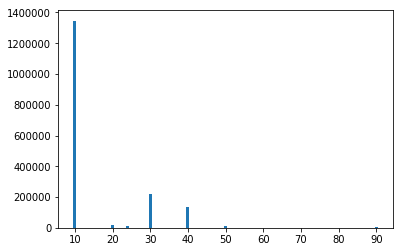

In [69]:
# 10	國產車 77%
# 20	美國車  1%
# 21	福特
# 22	通用
# 23	克萊斯勒
# 24	美規日車 1%
# 30	歐洲車 12.5%
# 40	日本車 7.7%
# 50	韓國車
# 90	其它

# counts
# df_car.groupby('Imported_or_Domestic_Car').count()
# 10    1346381
# 20      15375
# 21        858
# 22        207
# 23         29
# 24      14459
# 30     218102
# 40     134929
# 50      12249
# 90       5353

car_types = sorted(df_policy['Imported_or_Domestic_Car'].unique()) # [10, 20, 21, 22, 23, 24, 30, 40, 50, 90]

# for b in sorted(set(df_policy['Imported_or_Domestic_Car'])):
#     print(b, "  ", df_policy[df_policy['Imported_or_Domestic_Car'] == b].shape[0] / df_policy.shape[0] * 100, "%")
plt.bar(car_types, df_car['Imported_or_Domestic_Car'].value_counts().sort_index().values)

<Container object of 6 artists>

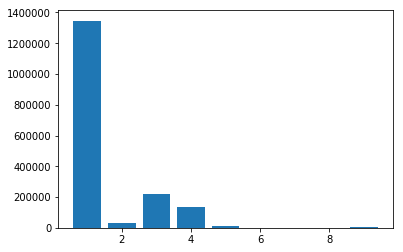

In [84]:
#  Imported_or_Domestic_Car 十位數
df_car = df_policy[['Imported_or_Domestic_Car']].copy()
df_car['car_types'] = (df_car['Imported_or_Domestic_Car'] /10).apply(np.floor)
df_car['car_types'].value_counts().sort_index().values
plt.bar(sorted(df_car['car_types'].unique()), df_car['car_types'].value_counts().sort_index())

## Coverage_Deductible_if_applied (自負額) 類別參照:險種分類及自負額說明Sheet

<Container object of 53 artists>

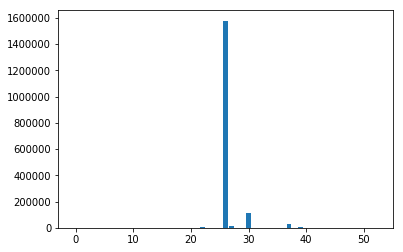

In [134]:
# Coverage_Deductible_if_applied(自負額) value counts

# 0   : 90.25%
# 10  : 6.4%
# 100 : 1.77%
# ...
# ==
# -100000          2
# -50000           2
# -35000           1
# -30000           5
# -22455          19
# -20000          22
# -15000           6
# -12455          30
# -10000          14
# -8000            3
# -5000           12
# -3000            9
# -255            26
# -224             1
# -155           136
# -124             7
# -100          1321
# -70              4
# -50              4
# -40             18
# -24              1
# -20             45
# -10           3760
# -3               1
# -2              98
# -1             596
#  0         1577591  90.25%
#  1           12463
#  2            1554
#  3              13
#  10         112069
#  20           1115
#  24             25
#  40            233
#  48              9
#  50             81
#  70             67
#  100         30873
#  124           232
#  155          2487
#  255           192
#  3000          276
#  5000          318
#  7510            7
#  8000           54
#  10000         384
#  12455         939
#  15000         304
#  20000         204
#  22455          78
#  30000         216
#  50000          12
#  100000          3
Coverage_Deductible_if_applied_value_counts = df_policy['Coverage_Deductible_if_applied'].value_counts().sort_index()
plt.bar(np.arange(len(Coverage_Deductible_if_applied_value_counts)), Coverage_Deductible_if_applied_value_counts.values)

## Insurance_Coverage 險種代碼

In [138]:
# 險種代碼對應自負額
for c in sorted(set(df_policy['Insurance_Coverage'])):
    print(c," ", set(df_policy[df_policy['Insurance_Coverage'] == c]['Coverage_Deductible_if_applied']) )

00I   {0, 1, 2, 8000, 20000, -8000, 3, 10000, 30000, 15000, -3, -1}
01A   {0}
01J   {0}
02K   {0, 1, 2, 3, 10000, 15000, 20000, 100000, 30000, -50000, 8000, -8000, -35000, 50000, -30000, -20000, -100000, -15000, -10000, -1, -2}
03L   {0}
04M   {0, -20000, 20000, 8000, 5000, -3000, 30000, 50000, 10000, -30000, -50000, 3000, 15000, -5000}
05E   {0}
05N   {0, 10, -20, 20, -10}
06F   {0}
07P   {0}
08H   {0}
09@   {0}
09I   {7510}
10A   {0, 10, 100, -10}
12L   {0}
14E   {0, 1, 100, 10, 20, -10, 155, 124}
14N   {0, 10, 20, -10}
15F   {0, 100, 70, 40, -50, 50, -40, -70, -100}
15O   {-224, 1, 2, -255, -124, -155, 12455, -22455, -2, 22455, -12455, 155, 124, -1, 255}
16G   {0, 10000, 5000}
16P   {0, 10000, -5000, 5000}
18@   {0}
18I   {0}
20B   {0}
20K   {0}
25G   {0}
26H   {0}
27I   {0}
29B   {0}
29K   {0, 1, 10}
32N   {0, 24, 48}
33F   {0, 24, 48}
33O   {0, 24, 48, -24}
34P   {0}
35H   {0}
36I   {0}
37J   {10000, 30000}
40M   {0}
41E   {0}
41N   {0}
42F   {0}
45@   {0}
46A   {0}
47B   {0}
51O 

## Main_Insurance_Coverage_Group 險種分類

In [ ]:
# 車責    1253120
# 車損     318013
# 竊盜     176809
Main_Insurance_Coverage_Group_value_counts = df_policy['Main_Insurance_Coverage_Group'].value_counts()
plt.bar(['車責', '車損', '竊盜'], df_policy['Main_Insurance_Coverage_Group'].value_counts().sort_values())
df1 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車責']
df2 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='竊盜']
df3 = df_policy[df_policy['Main_Insurance_Coverage_Group']=='車損']
## 'lia_class'車責本期級數   分級1-19 新戶從4開始 出險（+3) 沒有出險 (-1)  
## -1(55%) 0(7.6%) 要怎麼解釋？  

# ----->
# 解1: -1 0 都當作 1 解2: 當成調整項 +10% x lia_class

col = 'lia_class'
print('車責',df1[col].shape) #車責 (1253120,)
print('竊盜',df2[col].shape) #竊盜 (176809,)
print('車損',df3[col].shape) #車損 (318013,)
# 車責本期級數
print('車責', sorted(set(df1[col])))
print('竊盜', sorted(set(df2[col])))
print('車損', sorted(set(df3[col])))

'\n(%)\n-1  54.632198033707866 \n0   7.66486848825332 \n1   9.491189989785495 \n2   8.888294816138917\n3   7.6516215526046985\n4   8.230975485188969\n5   1.2548678498467825\n6   0.8911357252298264\n7   0.6505362614913177\n8   0.2353326098059244\n9   0.16678370786516852\n10  0.09847420837589378\n11  0.04365104698672114\n12  0.0400600102145046\n13  0.022902834525025534\n14  0.010852911133810011\n15  0.009576098059244127\n16  0.007581077630234934\n17  0.001995020429009193\n18  0.0040698416751787534\n19  0.0030324310520939736\n'

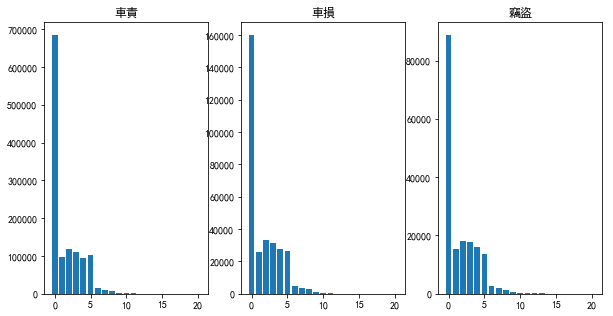

In [172]:
# 車責本期級數 in 險種分類
lia_classes = ['車責', '車損', '竊盜']
plt.figure(figsize=(10,5))
for index, lia_class in enumerate(lia_classes):
    lia_class_value_count = df_policy.loc[df_policy['Main_Insurance_Coverage_Group'] == lia_class, 'lia_class'].value_counts().sort_index()
    plt.subplot(1,3,index+1)
    plt.title(lia_class)
    plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)
    
#     for x in sorted(set(df1[col])):
#         print(x, df1[df1['lia_class']== x].shape[0]/df1.shape[0]*100)  
'''
(%)
-1  54.632198033707866 
0   7.66486848825332 
1   9.491189989785495 
2   8.888294816138917
3   7.6516215526046985
4   8.230975485188969
5   1.2548678498467825
6   0.8911357252298264
7   0.6505362614913177
8   0.2353326098059244
9   0.16678370786516852
10  0.09847420837589378
11  0.04365104698672114
12  0.0400600102145046
13  0.022902834525025534
14  0.010852911133810011
15  0.009576098059244127
16  0.007581077630234934
17  0.001995020429009193
18  0.0040698416751787534
19  0.0030324310520939736
'''

## pdmg_acc 車體賠款係數

In [176]:
col = 'pdmg_acc'
# print('車責', sorted(set(df1[col])))
# print('竊盜', sorted(set(df2[col])))
# print('車損', sorted(set(df3[col])))
# 車責 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0]
# 竊盜 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 2.0, 4.0]
# 車損 [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0]
# 竊盜 無 1.6

## lia_class 車責本期級數

<Container object of 21 artists>

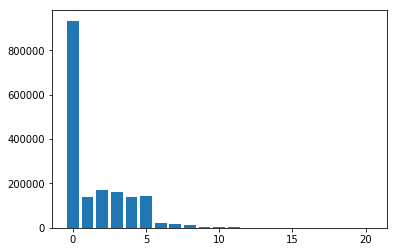

In [143]:
lia_class_value_count = df_policy['lia_class'].value_counts().sort_index()
plt.bar(np.arange(len(lia_class_value_count)), lia_class_value_count)

In [177]:
## Summary: 
# '''
# 'Insured_Amount1'                             : all postive - >negative
# 'Insured_Amount2'                             : all postive - >negative
# 'Insured_Amount3'                             : all postive - >negative
# 'Coverage_Deductible_if_applied'              : -100000 ~ 10000 -> take abs(Positive)
# 'Premium'                                     : all postive - > remain
# 'Replacement_cost_of_insured_vehicle'         : 1 ~ 8915  -> negative
# 'lia_class'                                   : set {-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
#                                                 11, 12, 13, 14, 15, 16, 17, 18, 19} >10 only 0.16%
#                                                 convert to 1+ (x * 10%)

# 'plia_acc'                                   : set [-0.38, -0.35, -0.3, -0.2, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 
#                                                     1.2, 1.5, 1.8, 2.1, 2.4, 2.8, 3.2, 3.7, 4.2, 4.7]
#                                                convert to (1+x)%
                                               
# 'pdmg_acc'                                   : set {-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.6, 2.0, 4.0}
#                                                  convert to (1+x)%                                            
                                                
# '''

## ibirth 出生日期,  dbirth 要保人出生日期

In [193]:
# null count
# ibirth                              317765
# dbirth                            258932
driver = df_policy[['ibirth' , 'dbirth']]
condition1 = driver['ibirth'].isnull()    # 18.2 %
condition2 = driver['dbirth'].isnull()    # 14.8 %

condition3 = driver['ibirth'].notnull()   
condition4 = driver['dbirth'].notnull()   


driver_0N= driver[condition3&condition4]  # both have values  (81.5%)
driver_1N= driver[condition1^condition2]  # missing one (3.9%)
driver_2N= driver[condition1|condition2]  # missing both (18.4%)

# print(driver_0N.shape[0]/driver.shape[0])
# print(driver_1N.shape[0]/driver.shape[0]) 
# print(driver_2N.shape[0]/driver.shape[0])

0.8152427254451234
0.039585409584528546
0.18475727455487653


In [206]:
# ibirth != dbirth
indiff = driver_0N[driver_0N['ibirth'] != driver_0N['dbirth']]
print(indiff.count()) #75794

ibirth    75794
dbirth    75794
dtype: int64


In [1]:
# weired dates
# 可參考 Accident_Date：出險日期
# https://tbrain.trendmicro.com.tw/Discussion/Forum/4
### dbirth has some weird date
### check non-null data & sort

# print(driver['dbirth'].notnull().sum()) # 1489010

# a = df_policy[driver['dbirth'].notnull()]['dbirth']
# b = sorted(a, key=lambda x: datetime.datetime.strptime(x, '%m/%Y'), reverse = True)
# driver_0N.loc[:,'ibirth_date'] = driver_0N.loc[:,'ibirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))
# driver_0N.loc[:,'dbirth_date'] = driver_0N.loc[:,'dbirth'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))

In [247]:
# len(driver_0N.loc[driver_0N['ibirth_date'] > datetime.datetime.now()]) # 0
# len(driver_0N.loc[driver_0N['dbirth_date'] > datetime.datetime.now()]) # 60

0

In [241]:
driver_0N['dbirth_date'].max(), driver_0N['dbirth_date'].min()  # max: 2658/9/1, min: 1912/2/1

(datetime.datetime(2658, 9, 1, 0, 0), datetime.datetime(1912, 2, 1, 0, 0))

## fassured 被保險人性質
1:國內自然人     1427579
2:國內法人        317771
3:國外自然人     2586
4:國外法人
5:自然人ID有誤 
6:法人ID有誤       6

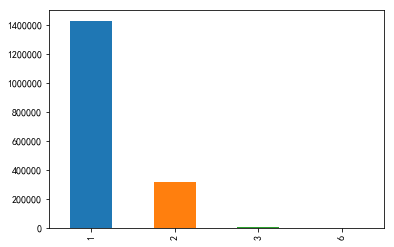

In [43]:
df_policy['fassured'].value_counts().plot(kind='bar')

# Claim File

(69613, 20)

Claim_Number	賠案號碼

Nature_of_the_claim	賠案性質

Policy_Number	保單號碼

Driver's_Gender	肇事駕駛性別

Driver's_Relationship_with_Insured	與被保險人關係

DOB_of_Driver	肇事駕駛出生日

Marital_Status_of_Driver	肇事駕駛婚姻

Accident_Date	出險日期

Cause_of_Loss	出險原因

Paid_Loss_Amount	已決賠款

paid_Expenses_Amount	已決費用

Salvage_or_Subrogation?	追償金額

Coverage	險種代號

Vehicle_identifier	車牌

At_Fault?	肇責比例

Claim_Status_(close,_open,_reopen_etc)	單一險種CLOSE

Deductible	自負額

Accident_area	出險地區

number_of_claimants	事故關係人人數

Accident_Time	出險時間

# check Claim NAN

In [49]:
df_claim.isnull().sum()
# Vehicle_identifier: 298
# At_Fault?: 39

## Nature_of_the_claim 賠案性質

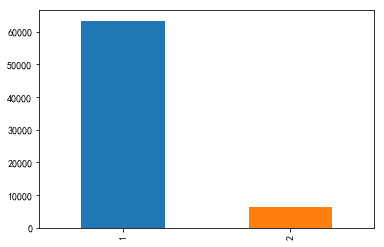

In [52]:
# 1: 賠償 63389
# 2: 追償 6224
df_claim['Nature_of_the_claim'].value_counts().plot(kind='bar')

## Driver's_Gender 肇事駕駛性別

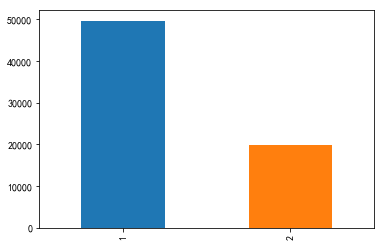

In [55]:
# 1: 男 49698
# 2: 女 19915
df_claim['Driver\'s_Gender'].value_counts().plot(kind='bar')

# Driver's_Relationship_with_Insured 與被保險人關係
1:被保險人本人  30134
2:被保險人親友 15074
3:被保險人員工  8231
4:租用被保險車輛  78
5:其他,  10130
6:配偶, 4654
7:子女 1312

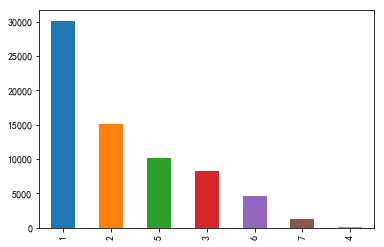

In [66]:
df_claim['Driver\'s_Relationship_with_Insured'].value_counts().plot(kind='bar')

# DOB_of_Driver 肇事駕駛生日

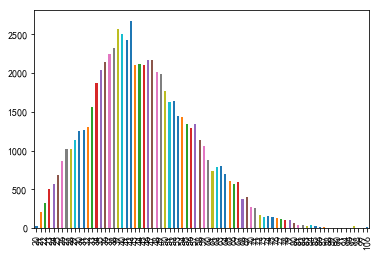

In [11]:
# 年紀分佈
(2018 - df_claim['DOB_of_Driver'].apply(lambda x: datetime.datetime.strptime(x, '%m/%Y')).dt.year).value_counts().sort_index().plot(kind='bar')

# Marital_Status_of_Driver 肇事駕駛婚姻
1: 已婚 52481
2: 未婚 17132

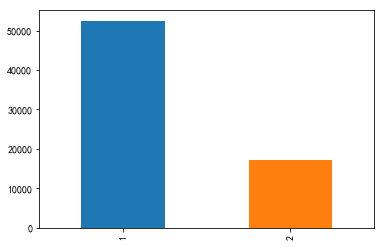

In [14]:
df_claim['Marital_Status_of_Driver'].value_counts().plot(kind='bar')

##  Accident_Date 出險日期

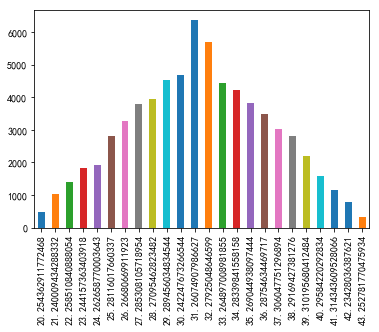

In [24]:
# 出險日期分佈 近<->遠
((datetime.datetime.now() - df_claim['Accident_Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m'))) / np.timedelta64(1, 'M')).value_counts().sort_index().plot(kind='bar')

## Cause_of_Loss 出險原因
17 kinds

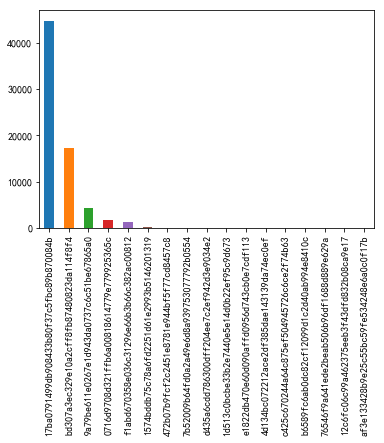

In [27]:
df_claim['Cause_of_Loss'].value_counts().plot(kind='bar')

# Paid_Loss_Amount 已決賠款

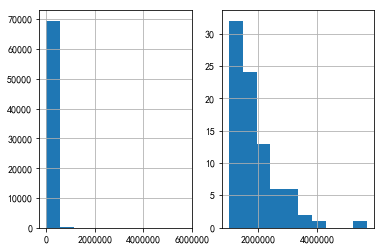

In [94]:
plt.subplot(1,2,1)
df_claim['Paid_Loss_Amount'].hist()
plt.subplot(1,2,2)
df_claim[df_claim['Paid_Loss_Amount'] >= 1000000]['Paid_Loss_Amount'].hist()

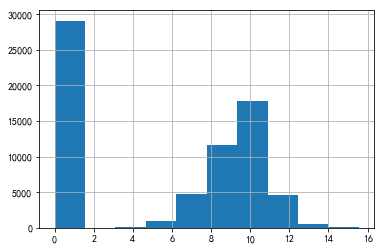

In [95]:
# log(x+1)
np.log(df_claim['Paid_Loss_Amount'] + 1).hist()

# paid_Expenses_Amount 已決費用

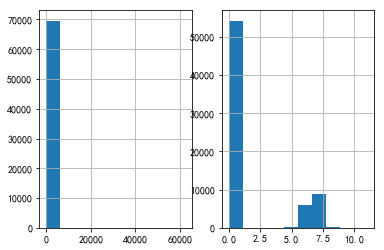

In [99]:
plt.subplot(121)
df_claim['paid_Expenses_Amount'].hist()
plt.subplot(122)
np.log(df_claim['paid_Expenses_Amount'] +1).hist() # log(x+1)

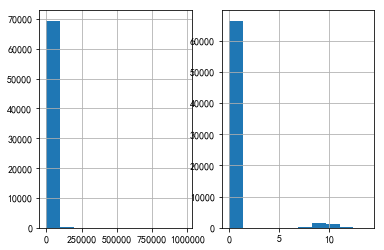

In [100]:
# Salvage_or_Subrogation? 追償金額
plt.subplot(121)
df_claim['Salvage_or_Subrogation?'].hist()
plt.subplot(122)
np.log(df_claim['Salvage_or_Subrogation?'] +1).hist() # log(x+1)

In [104]:
#已決賠款 已決費用 追償金額 
#關係？
df_claim[['Paid_Loss_Amount','paid_Expenses_Amount', 'Salvage_or_Subrogation?']].head()

,Paid_Loss_Amount,paid_Expenses_Amount,Salvage_or_Subrogation?
0,56705,0,0
1,30000,700,0
2,1100,0,0
3,151795,700,0
4,0,0,0


# Coverage 險種代號

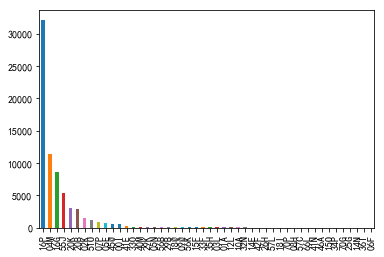

In [111]:
df_claim['Coverage'].value_counts().plot(kind='bar')

# Vehicle_identifier 車牌

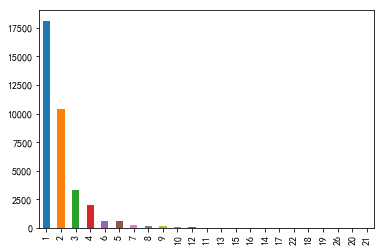

In [15]:
# 車牌事故數 次數分佈
df_claim['Vehicle_identifier'].value_counts().value_counts().plot(kind='bar')

# At_Fault? 肇責比例

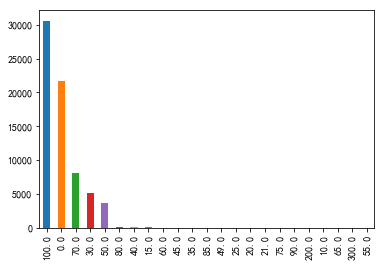

In [19]:
# 肇事比例分佈
df_claim['At_Fault?'].value_counts().plot(kind='bar')

# Claim_Status_(close,_open,_reopen_etc) 單一險種CLOSE
1.已經全部結案: 69604

0.尚未全部結案: 9

In [24]:
df_claim['Claim_Status_(close,_open,_reopen_etc)'].value_counts()

1    69604
0        9
Name: Claim_Status_(close,_open,_reopen_etc), dtype: int64

# Deductible 自負額
0: 69163筆

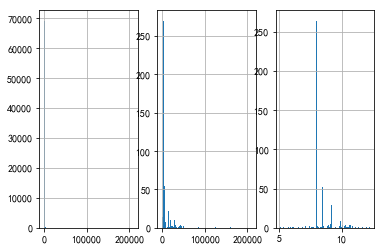

In [63]:
plt.subplot(1,3,1)
df_claim['Deductible'].hist(bins=100)
plt.subplot(1,3,2)
df_claim[df_claim['Deductible'] > 0]['Deductible'].hist(bins=100)
plt.subplot(1,3,3)
np.log(df_claim[df_claim['Deductible'] > 0]['Deductible']).hist(bins=100)

In [46]:
df_claim['Deductible'].describe()

count     69613.000000
mean         53.604197
std        1472.570564
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      209610.000000
Name: Deductible, dtype: float64

# Accident_area 出險地區

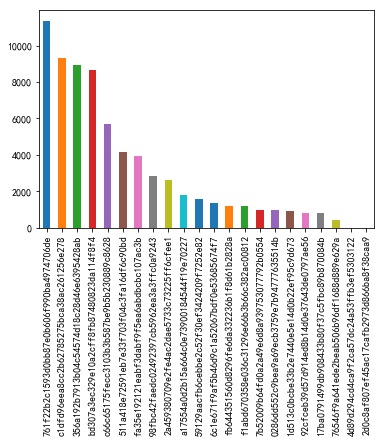

In [66]:
df_claim['Accident_area'].value_counts().plot(kind='bar')

# number_of_claimants 事故關係人人數

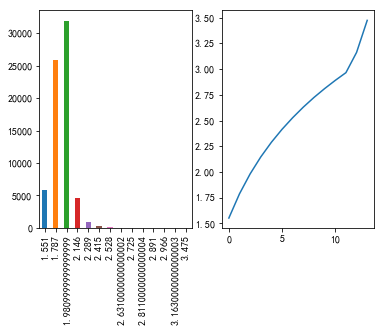

In [82]:
plt.subplot(121)
df_claim['number_of_claimants'].value_counts().sort_index().plot(kind='bar') # value distribution
plt.subplot(122)
plt.plot(df_claim['number_of_claimants'].value_counts().sort_index().index.values) # y: raw number of claimants

In [ ]:
# Accident_Time 出險時間

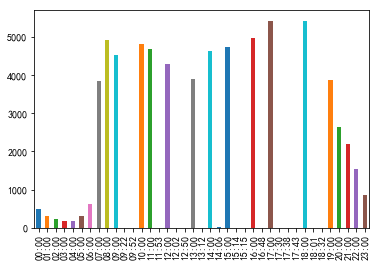

In [86]:
# .apply(lambda x: datetime.datetime.strptime(x, '%m/%Y'))
plt
df_claim['Accident_Time'].value_counts().sort_index().plot(kind='bar')